<a href="https://colab.research.google.com/github/umayu06/Object-Detection/blob/master/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using TensorFlow backend.


170500096/170498071 [==============================] - 2s 0us/step
Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


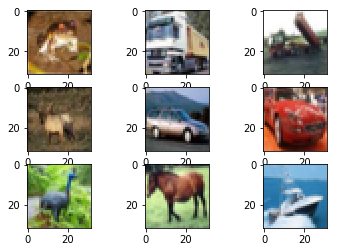

In [0]:
from matplotlib import pyplot
from keras.datasets import cifar10
# load dataset
(trainX, trainY), (testX, testY) = cifar10.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Test: X=%s, y=%s' % (testX.shape, testY.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i])
# show the figure
pyplot.show()

In [0]:
from keras.utils import to_categorical

In [0]:
# load train and test dataset
#def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	#return trainX, trainY, testX, testY

In [0]:
#def prep_pixels(train, test):
	# convert from integers to floats
trainX = trainX.astype('float32')
testX= testX.astype('float32')
	# normalize to range 0-1
trainX = trainX/ 255.0
testX = testX/ 255.0
	# return normalized images
	#return train_norm, test_norm

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from keras.constraints import max_norm
from keras import optimizers

In [0]:
# Create the model
def define_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), input_shape=(32, 32,3), activation='relu', padding='same'))
  model.add(Dropout(0.2))
  model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(Dropout(0.2))
  model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
  model.add(Dropout(0.2))
  model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dropout(0.2))
  model.add(Dense(1024, activation='relu', kernel_constraint=max_norm(3)))
  model.add(Dropout(0.2))
  model.add(Dense(512, activation='relu', kernel_constraint=max_norm(3)))
  model.add(Dropout(0.2))
  model.add(Dense(10, activation='softmax'))
# Compile model
  epochs = 25
  lrate = 0.01
  decay = lrate/epochs
  sgd = optimizers.SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
  model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
  print(model.summary())
  return model

In [0]:
model=define_model()
history=model.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=64)
print(history)

W0731 06:48:21.284051 139756859688832 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0731 06:48:21.306113 139756859688832 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0731 06:48:21.310657 139756859688832 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0731 06:48:21.324829 139756859688832 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0731 06:48:21.333828 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
__________

In [0]:
acc = model.evaluate(testX, testY, verbose=0)
print(acc[1]*100)



78.4


https://machinelearningmastery.com/object-recognition-convolutional-neural-networks-keras-deep-learning-library/

https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/

https://machinelearningmastery.com/how-to-perform-object-detection-with-yolov3-in-keras/

In [0]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

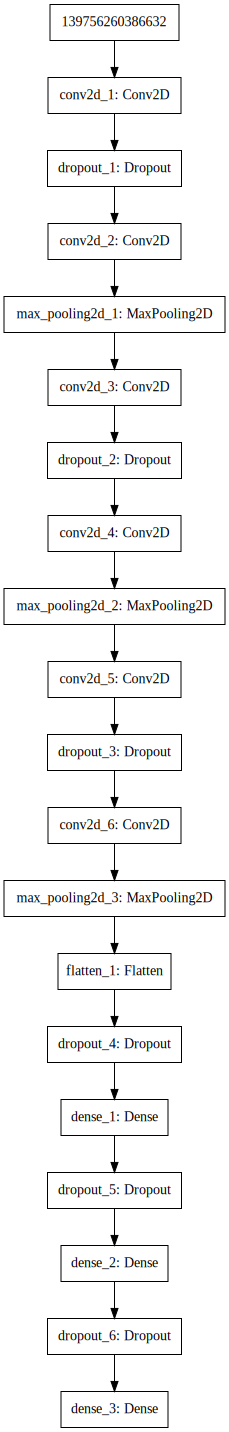

In [0]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))



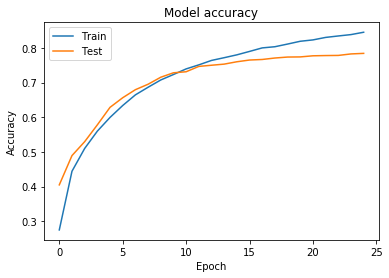

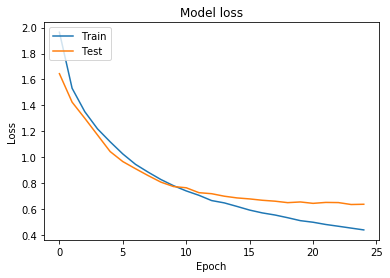

In [0]:
import matplotlib.pyplot as plt

#history = model.fit(trainX, trainY, validation_split=0.25, epochs=50, batch_size=32, verbose=0)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/save_and_restore_models.ipynb

In [0]:
model.save('my_model.h5')

In [0]:
model.save_weights('./cifar_10.h5', overwrite=True)

In [0]:
import numpy as np
import cv2

(1, 32, 32, 3)


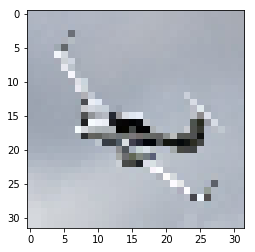

In [0]:
from matplotlib import pyplot
img=pyplot.imread('air1.JPG')
img=cv2.resize(img,(32,32))
pyplot.imshow(img)
img = np.expand_dims(img, axis=0) #to expand the dim of image to 4D 
#img=np.squeeze(img) #to reduce the dim of image
print(img.shape)


[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


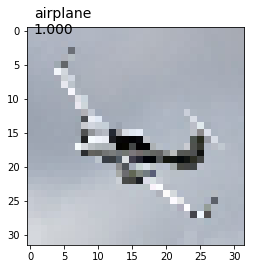

In [0]:
LABEL_NAMES = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
pyplot.imshow(np.squeeze(img))

#cpu_model = define_model()
model.load_weights('./cifar_10.h5')
print(model.predict(img))

from matplotlib import pyplot
%matplotlib inline


def plot_predictions(images, predictions):
   
    
    label = LABEL_NAMES[np.argmax(predictions)]
    confidence = np.max(predictions)
    pyplot.imshow(images)
    pyplot.text(0.5, 0.5, label + '\n%.3f' % confidence, fontsize=14)

   # pyplot.gcf().set_size_inches(8, 8)  

plot_predictions(np.squeeze(img), 
                 model.predict(img))


In [0]:
from google.colab import drive
drive.mount('/content/drive')

cifar10: https://towardsdatascience.com/cifar-10-image-classification-in-tensorflow-5b501f7dc77c

CNN: http://parneetk.github.io/blog/cnn-cifar10/